## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
from sklearn.preprocessing import MinMaxScaler
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
        scaler = MinMaxScaler(feature_range=(-1,1))
        x = scaler.fit_transform(x)
    return x



def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [7]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# # Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)               

In [9]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [10]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [11]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 7s 34ms/step - loss: 1.7587 - accuracy: 0.3769 - val_loss: 1.5706 - val_accuracy: 0.4416
Epoch 2/100
196/196 [==============================] - 6s 29ms/step - loss: 1.4941 - accuracy: 0.4711 - val_loss: 1.4639 - val_accuracy: 0.4878
Epoch 3/100
196/196 [==============================] - 6s 32ms/step - loss: 1.3666 - accuracy: 0.5212 - val_loss: 1.4195 - val_accuracy: 0.4956
Epoch 4/100
196/196 [==============================] - 5s 27ms/step - loss: 1.2702 - accuracy: 0.5526 - val_loss: 1.3933 - val_accuracy: 0.5174
Epoch 5/100
196/196 [==============================] - 5s 27ms/step - loss: 1.1897 - accuracy: 0.5810 - val_loss: 1.3926 - val_accuracy: 0.5173
Epoch 6/100
196/196 [==============================] - 5s 28ms/step - loss: 1.1129 - accuracy: 0.6088 - val_loss: 1.3773 - val_accuracy: 0.5267
Epoch 7/100
196/196 [==============================] - 5s 26ms/step - loss: 1.0420 - accuracy: 0.6323 - val_loss: 1.3871 - val_accuracy:

196/196 [==============================] - 5s 26ms/step - loss: 0.1203 - accuracy: 0.9606 - val_loss: 3.9841 - val_accuracy: 0.5294
Epoch 58/100
196/196 [==============================] - 5s 26ms/step - loss: 0.1066 - accuracy: 0.9645 - val_loss: 4.0976 - val_accuracy: 0.5339
Epoch 59/100
196/196 [==============================] - 5s 26ms/step - loss: 0.0939 - accuracy: 0.9684 - val_loss: 4.0903 - val_accuracy: 0.5276
Epoch 60/100
196/196 [==============================] - 5s 26ms/step - loss: 0.1079 - accuracy: 0.9652 - val_loss: 4.0280 - val_accuracy: 0.5249
Epoch 61/100
196/196 [==============================] - 5s 26ms/step - loss: 0.1046 - accuracy: 0.9654 - val_loss: 4.0411 - val_accuracy: 0.5271
Epoch 62/100
196/196 [==============================] - 5s 26ms/step - loss: 0.0976 - accuracy: 0.9677 - val_loss: 4.1019 - val_accuracy: 0.5309
Epoch 63/100
196/196 [==============================] - 5s 26ms/step - loss: 0.0974 - accuracy: 0.9679 - val_loss: 4.0075 - val_accuracy: 0.530

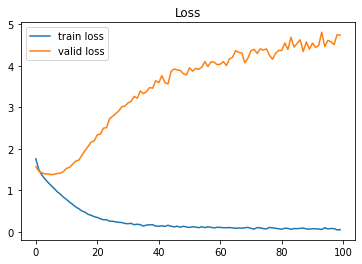

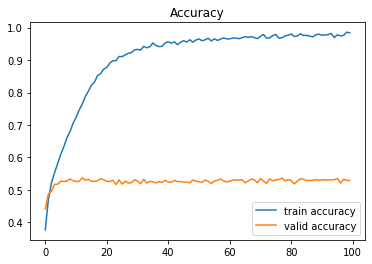

In [12]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()